model of Number of scheduled trains x Number of trains delayed at arrival and tx of performance R2

In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class StationData:
    def __init__(self, csv, date):
        data = {}
        newcsv = csv.dropna(subset = "Date")
        newcsv = newcsv[(newcsv["Date"] >= date[0]) & (newcsv["Date"] <= date[1])]
        for i in range(len(newcsv)):
            station = newcsv.iloc[i]["Departure station"]
            scheduled = newcsv.iloc[i]["Number of scheduled trains"]
            cancelled = newcsv.iloc[i]["Number of cancelled trains"]
            late = newcsv.iloc[i]["Number of trains delayed at departure"]

            if pd.notna(station) and pd.notna(scheduled) and pd.notna(cancelled) and pd.notna(late):
                if station not in data:
                    data[station] = [0, 0, 0]
                data[station][0] += scheduled
                data[station][1] += cancelled
                data[station][2] += late
        self.df = pd.DataFrame.from_dict(
            data, orient='index', columns=['Scheduled', 'Cancelled', 'Late']
        ).reset_index()
        self.df = self.df.rename(columns={'index': 'Departure station'})


In [420]:

def station_scheduled_late(self, station_list):
    df = self.df
    df.loc[~df["Departure station"].isin(station_list), "Departure station"] = np.nan
    df = df.dropna(subset = "Departure station")
    pos = np.arange(len(df["Departure station"]))
    width = 0.5
    plt.barh(pos + width / 3, df["Late"], width / 3, color='lightsteelblue', label='Late')
    plt.barh(pos, df["Scheduled"], width / 3, color='IndianRed', label='Scheduled')
    plt.barh(pos - width / 3, df["Cancelled"], width / 3, color='Blue', label='Cancelled')
    plt.yticks(pos, df["Departure station"])
    plt.xlabel("Number of Trains", fontsize=14)
    plt.title("Scheduled, Cancelled, and Late Trains per Station", fontsize=15)
    plt.legend()
    plt.tight_layout()
    plt.show()
StationData.station_scheduled_late = station_scheduled_late

In [421]:
class LateData():
    def __init__(self, csv, date):
        data = {}
        newcsv = csv.dropna(subset = "Date")
        newcsv = newcsv[(newcsv["Date"] >= date[0]) & (newcsv["Date"] <= date[1])]
        for i in range(len(newcsv)):
            station = newcsv.iloc[i]["Departure station"]
            trainlate = newcsv.iloc[i]["Number of trains delayed at arrival"]
            late15 = newcsv.iloc[i]["Number of trains delayed > 15min"]
            late30 = newcsv.iloc[i]["Number of trains delayed > 30min"]
            late60 = newcsv.iloc[i]["Number of trains delayed > 60min"]

            if pd.notna(station) and pd.notna(trainlate) and pd.notna(late15) and pd.notna(late30) and pd.notna(late60):
                if station not in data:
                    data[station] = [0, 0, 0, 0]
                data[station][0] += trainlate
                data[station][1] += late15
                data[station][2] += late30
                data[station][3] += late60
        self.df = pd.DataFrame.from_dict(
            data, orient='index', columns=['trainlate', 'late15', 'late30', 'late60']
        ).reset_index()
        self.df = self.df.rename(columns={'index': 'station'})


In [422]:
def late_train_data(self, station_list):
    df = self.df.copy()
    df.loc[~df["station"].isin(station_list), "station"] = np.nan
    df = df.dropna(subset=["station"])
    df["total"] = df["trainlate"]
    df["late15_only"] = df["late15"] - df["late30"]
    df["late30_only"] = df["late30"] - df["late60"]
    df["late60_only"] = df["late60"]
    df["lateless15min"] = df["trainlate"] - df["late15"]
    df = df[df["total"] > 0]
    df["late15_pct"] = df["late15_only"] / df["total"] * 100
    df["late30_pct"] = df["late30_only"] / df["total"] * 100
    df["late60_pct"] = df["late60_only"] / df["total"] * 100
    df["lateless15min"] = df["lateless15min"] / df["total"] * 100
    pos = np.arange(len(df["station"]))
    plt.barh(pos, df["lateless15min"], color='green', label='Retard <15 min')
    plt.barh(pos, df["late15_pct"], color='lightsteelblue', label='Retard ≥15 min', left = df["lateless15min"])
    plt.barh(pos, df["late30_pct"], color='IndianRed', label='Retard ≥30 min', left = df["lateless15min"] + df["late15_pct"])
    plt.barh(pos, df["late60_pct"], color='Blue', label='Retard ≥60 min', left = df["lateless15min"] + df["late15_pct"] + df["late30_pct"])
    plt.yticks(pos, df["station"])
    plt.xlabel("Pourcentage de trains en retard(%)", fontsize=14)
    plt.legend()
LateData.late_train_data = late_train_data


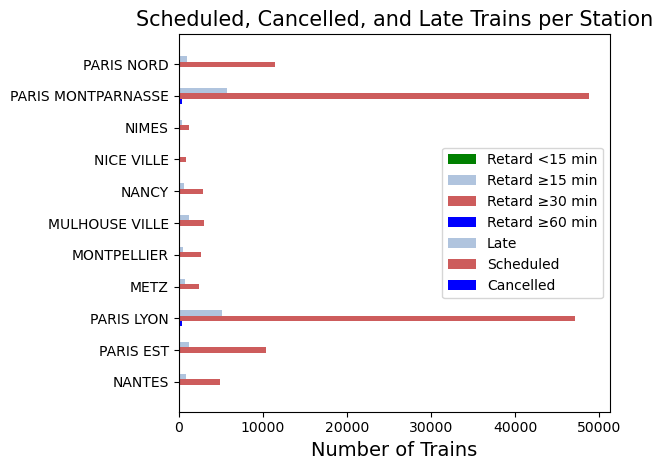

In [ ]:
csv = pd.read_csv("cleaned_dataset.csv")
date = ["2024,01", "2025,01"]
station_list = ['METZ', 
               'MONTPELLIER', 
               'MULHOUSE VILLE', 
               'NANCY', 
               'NANTES', 
               'NICE VILLE', 
               'NIMES', 
               'PARIS EST', 
               'PARIS LYON', 
               'PARIS MONTPARNASSE', 
               'PARIS NORD']
latedata = LateData(csv, date)
latedata.late_train_data(station_list)
#stdata = StationData(csv, date)
#stdata.station_scheduled_late(station_list)